In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
pd.options.display.max_columns = 999

In [2]:
df = pd.read_csv('pivoted.csv')
british = pd.read_csv('british.csv').dropna()
continent = pd.read_csv('continent.csv')
education = pd.read_csv('education.csv')

In [3]:
education = education.replace('..',np.nan)
education.head()

,Time,Time Code,Country Name,Country Code,"Account ownership at a financial institution or with a mobile-money-service provider, primary education or less (% of population ages 15+) [FX.OWN.TOTL.PL.ZS]","Account ownership at a financial institution or with a mobile-money-service provider, secondary education or more (% of population ages 15+) [FX.OWN.TOTL.SO.ZS]",Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS],Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD],"All education staff compensation, primary (% of total expenditure in primary public institutions) [SE.XPD.MPRM.ZS]","All education staff compensation, secondary (% of total expenditure in secondary public institutions) [SE.XPD.MSEC.ZS]","All education staff compensation, tertiary (% of total expenditure in tertiary public institutions) [SE.XPD.MTER.ZS]","All education staff compensation, total (% of total expenditure in public institutions) [SE.XPD.MTOT.ZS]","Compulsory education, duration (years) [SE.COM.DURS]","Current education expenditure, primary (% of total expenditure in primary public institutions) [SE.XPD.CPRM.ZS]","Current education expenditure, secondary (% of total expenditure in secondary public institutions) [SE.XPD.CSEC.ZS]","Current education expenditure, tertiary (% of total expenditure in tertiary public institutions) [SE.XPD.CTER.ZS]","Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]","Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative) [SE.TER.CUAT.BA.FE.ZS]","Educational attainment, at least Bachelor's or equivalent, population 25+, male (%) (cumulative) [SE.TER.CUAT.BA.MA.ZS]","Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative) [SE.TER.CUAT.BA.ZS]","Educational attainment, at least completed lower secondary, population 25+, female (%) (cumulative) [SE.SEC.CUAT.LO.FE.ZS]","Educational attainment, at least completed lower secondary, population 25+, male (%) (cumulative) [SE.SEC.CUAT.LO.MA.ZS]","Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative) [SE.SEC.CUAT.LO.ZS]","Educational attainment, at least completed post-secondary, population 25+, female (%) (cumulative) [SE.SEC.CUAT.PO.FE.ZS]","Educational attainment, at least completed post-secondary, population 25+, male (%) (cumulative) [SE.SEC.CUAT.PO.MA.ZS]","Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative) [SE.SEC.CUAT.PO.ZS]","Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative) [SE.PRM.CUAT.FE.ZS]","Educational attainment, at least completed primary, population 25+ years, male (%) (cumulative) [SE.PRM.CUAT.MA.ZS]","Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative) [SE.PRM.CUAT.ZS]","Educational attainment, at least completed short-cycle tertiary, population 25+, female (%) (cumulative) [SE.TER.CUAT.ST.FE.ZS]","Educational attainment, at least completed short-cycle tertiary, population 25+, male (%) (cumulative) [SE.TER.CUAT.ST.MA.ZS]","Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative) [SE.TER.CUAT.ST.ZS]","Educational attainment, at least completed upper secondary, population 25+, female (%) (cumulative) [SE.SEC.CUAT.UP.FE.ZS]","Educational attainment, at least completed upper secondary, population 25+, male (%) (cumulative) [SE.SEC.CUAT.UP.MA.ZS]","Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative) [SE.SEC.CUAT.UP.ZS]","Educational attainment, at least Master's or equivalent, population 25+, female (%) (cumulative) [SE.TER.CUAT.MS.FE.ZS]","Educational attainment, at least Master's or equivalent, population 25+, male (%) (cumulative) [SE.TER.CUAT.MS.MA.ZS]","Educational attainment, at least Master's or equivalent, population 25

In [4]:
df = pd.merge(df, education, on=['Time Code','Country Code'])

In [5]:
df = df.replace('NaN',np.nan)
df.head()

,Time_x,Time Code,Country Name_x,Country Code,"Population, total [SP.POP.TOTL]",Population growth (annual %) [SP.POP.GROW],Surface area (sq. km) [AG.SRF.TOTL.K2],Poverty headcount ratio at national poverty lines (% of population) [SI.POV.NAHC],"GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]","GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]","GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]","GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]",Income share held by lowest 20% [SI.DST.FRST.20],"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]","Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]","Contraceptive prevalence, any methods (% of women ages 15-49) [SP.DYN.CONU.ZS]",Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS],"Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]","Prevalence of underweight, weight for age (% of children under 5) [SH.STA.MALN.ZS]","Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]","Primary completion rate, total (% of relevant age group) [SE.PRM.CMPT.ZS]","School enrollment, secondary (% gross) [SE.SEC.ENRR]","School enrollment, primary and secondary (gross), gender parity index (GPI) [SE.ENR.PRSC.FM.ZS]","Prevalence of HIV, total (% of population ages 15-49) [SH.DYN.AIDS.ZS]",Forest area (sq. km) [AG.LND.FRST.K2],"Water productivity, total (constant 2010 US$ GDP per cubic meter of total freshwater withdrawal) [ER.GDP.FWTL.M3.KD]",Energy use (kg of oil equivalent per capita) [EG.USE.PCAP.KG.OE],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],Electric power consumption (kWh per capita) [EG.USE.ELEC.KH.PC],GDP (current US$) [NY.GDP.MKTP.CD],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]","Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]","Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]",Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS],Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS],Gross capital formation (% of GDP) [NE.GDI.TOTL.ZS],"Revenue, excluding grants (% of GDP) [GC.REV.XGRT.GD.ZS]",Start-up procedures to register a business (number) [IC.REG.PROC],Market capitalization of listed domestic companies (% of GDP) [CM.MKT.LCAP.GD.ZS],Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS],Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2],High-technology exports (% of manufactured exports) [TX.VAL.TECH.MF.ZS],Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS],Net barter terms of trade index (2000 = 100) [TT.PRI.MRCH.XD.WD],"External debt stocks, total (DOD, current US$) [DT.DOD.DECT.CD]",Total debt service (% of GNI) [DT.TDS.DECT.GN.ZS],Net migration [SM.POP.NETM],"Personal remittances, paid (current US$) [BM.TRF.PWKR.CD.DT]","Foreign direct investment, net inflows (BoP, current US$) [BX.KLT.DINV.CD.WD]",Net ODA received per capita (current US$) [DT.ODA.ODAT.PC.ZS],GDP per capita (current US$) [NY.GDP.PCAP.CD],"Foreign direct investment, net (BoP, current US$) [BN.KLT.DINV.CD]","Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Oil rents (% of GDP) [NY.GDP.PETR.RT.ZS],Time_y,Country Name_y,"Account ownership at a financial institution or with a mobile-money-service provider, primary education or less (% of population ages 15+) [FX.OWN.TOTL.PL.ZS]","Account ownership at a financial institution or with a mobile-money-service provider, secondary education or more (% of population ages 15+) [FX.OWN.TOTL.SO.ZS]",Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS],Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD],"All education staff compensation, primary (% of total expenditure in primary public institutions) [SE.XPD.MPRM.ZS]","All education staff compensation, secondary (% of total expenditure in secondary public institutions) [SE.XPD.MSEC.ZS]","A

In [6]:
from collections import OrderedDict
dd = OrderedDict(sorted(dict(df.isnull().sum()).items(), key=lambda x: x[1]))
print(dd)

OrderedDict([('Time_x', 15), ('Time_y', 15), ('Time Code', 25), ('Country Name_x', 25), ('Country Code', 25), ('Country Name_y', 25), ('Population, total [SP.POP.TOTL]', 31), ('Population growth (annual %) [SP.POP.GROW]', 32), ('Surface area (sq. km) [AG.SRF.TOTL.K2]', 36), ('Primary education, duration (years) [SE.PRM.DURS]', 189), ('Secondary education, duration (years) [SE.SEC.DURS]', 247), ('GDP (current US$) [NY.GDP.MKTP.CD]', 309), ('GDP per capita (current US$) [NY.GDP.PCAP.CD]', 309), ('GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]', 365), ('Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]', 366), ('Foreign direct investment, net inflows (BoP, current US$) [BX.KLT.DINV.CD.WD]', 428), ('Preprimary education, duration (years) [SE.PRE.DURS]', 428), ('Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2]', 456), ('Net barter terms of trade index (2000 = 100) [TT.PRI.MRCH.XD.WD]', 510), ('GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]', 514), ('GNI per capita, Atlas me

In [7]:
d = dict(df.isnull().sum())
targets = [*{key: d[key] for key in d if d[key] < 1000}]

In [8]:
len(targets)

43

In [9]:
filtered = df[targets].dropna()

In [10]:
filtered.shape

(1717, 43)

In [11]:
dd = OrderedDict(sorted(dict(education.isnull().sum()).items(), key=lambda x: x[1]))
print(dd)

OrderedDict([('Time', 3), ('Time Code', 5), ('Country Name', 5), ('Country Code', 5), ('Primary education, duration (years) [SE.PRM.DURS]', 296), ('Secondary education, duration (years) [SE.SEC.DURS]', 388), ('Preprimary education, duration (years) [SE.PRE.DURS]', 578), ('Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS]', 797), ('Primary education, pupils (% female) [SE.PRM.ENRL.FE.ZS]', 1611), ('Secondary education, general pupils (% female) [SE.SEC.ENRL.GC.FE.ZS]', 1979), ('Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD]', 2271), ('Compulsory education, duration (years) [SE.COM.DURS]', 2306), ('Secondary education, pupils (% female) [SE.SEC.ENRL.FE.ZS]', 2326), ('Gross intake ratio in first grade of primary education, total (% of relevant age group) [SE.PRM.GINT.ZS]', 2423), ('Primary education, pupils [SE.PRM.ENRL]', 2477), ('Primary education, teachers (% female) [SE.PRM.TCHR.FE.ZS]', 2510), ('Gross intake ratio in first grade of primary

In [12]:
british.head()

,Name of colony,Current country,from,to,Reason for change of status
0,Aden,Saudi Arabia,1937,1967,Became part of the Federation of South Arabia.
1,Bahamas,Bahamas,1718,1973,Became an independent Commonwealth Realm.
2,Basutoland,Lesotho,1884,1964,Became British protectorate in 1964; then beca...
3,Bermuda,United Kingdom,1684,1981,Became British Dependent Territory in 1981.
4,British Bechuanaland,Botswana,1885,1895,Became part of British Cape Colony in 1895.


In [13]:
continent.head()

,CC,a-2,a-3,#,Name
0,AS,AF,AFG,4.0,"Afghanistan, Islamic Republic of"
1,EU,AL,ALB,8.0,"Albania, Republic of"
2,AN,AQ,ATA,10.0,Antarctica (the territory South of 60 deg S)
3,AF,DZ,DZA,12.0,"Algeria, People's Democratic Republic of"
4,OC,AS,ASM,16.0,American Samoa


In [14]:
set(british['Current country'])

{'Australia',
 'Bahamas',
 'Belize',
 'Botswana',
 'Burma',
 'Canada',
 'Cyprus',
 'Gambia',
 'Ghana',
 'Guyana',
 'Hong Kong',
 'India',
 'Jamaica',
 'Kenya',
 'Lesotho',
 'Malaysia',
 'Malta',
 'Mauritius',
 'New Zealand',
 'Nigeria',
 'Saudi Arabia',
 'Seychelles',
 'Sierra Leone',
 'Singapore',
 'South Africa',
 'Sri Lanka',
 'St. Kitts and Nevis',
 'United Kingdom',
 'United States',
 'Zimbabwe'}

In [15]:
crown = df[df['Country Name_x'].isin(british['Current country'])]

In [16]:
continent.head()

,CC,a-2,a-3,#,Name
0,AS,AF,AFG,4.0,"Afghanistan, Islamic Republic of"
1,EU,AL,ALB,8.0,"Albania, Republic of"
2,AN,AQ,ATA,10.0,Antarctica (the territory South of 60 deg S)
3,AF,DZ,DZA,12.0,"Algeria, People's Democratic Republic of"
4,OC,AS,ASM,16.0,American Samoa


In [17]:
filtered.head()

,Time_x,Time Code,Country Name_x,Country Code,"Population, total [SP.POP.TOTL]",Population growth (annual %) [SP.POP.GROW],Surface area (sq. km) [AG.SRF.TOTL.K2],"GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]","GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]","GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]","GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]","Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]","Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]","Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]",Forest area (sq. km) [AG.LND.FRST.K2],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],GDP (current US$) [NY.GDP.MKTP.CD],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]","Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]","Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]",Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS],Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS],Gross capital formation (% of GDP) [NE.GDI.TOTL.ZS],Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2],Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS],Net barter terms of trade index (2000 = 100) [TT.PRI.MRCH.XD.WD],"Personal remittances, paid (current US$) [BM.TRF.PWKR.CD.DT]","Foreign direct investment, net inflows (BoP, current US$) [BX.KLT.DINV.CD.WD]",GDP per capita (current US$) [NY.GDP.PCAP.CD],"Foreign direct investment, net (BoP, current US$) [BN.KLT.DINV.CD]","Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Oil rents (% of GDP) [NY.GDP.PETR.RT.ZS],Time_y,Country Name_y,Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS],Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD],"Compulsory education, duration (years) [SE.COM.DURS]","Preprimary education, duration (years) [SE.PRE.DURS]","Primary education, duration (years) [SE.PRM.DURS]","Secondary education, duration (years) [SE.SEC.DURS]"
5,2000,YR2000,Angola,AGO,16440924.0,3.032943,1246700.0,5.903014e+09,360.0,3.054863e+10,1860.0,47.113000,6.639,196.6992,207.0,36.0,597280.0,0.580353,9.129595e+09,3.054624,418.018992,5.664690,72.122955,89.685831,62.861278,30.493219,0.156962,120.060093,100.0,2.662900e+08,8.786200e+08,555.296942,-8.786200e+08,324.996872,59.685139,2000,Angola,2.99,222717392.2285,4,3,4,7
7,2000,YR2000,Argentina,ARG,37057452.0,1.110875,2780400.0,2.755443e+11,7440.0,4.260279e+11,11500.0,73.832000,2.561,66.8976,19.4,91.0,318600.0,3.835574,2.842038e+11,-0.788999,1.037287,4.679917,25.990948,10.986396,11.636106,16.192696,17.507815,18.119043,100.0,2.677000e+08,1.041831e+10,7669.273916,-9.517286e+09,-0.935939,1.794962,2000,Argentina,4.6,12726176000,10,3,6,6
8,2000,YR2000,Armenia,ARM,3069588.0,-0.630957,29740.0,2.025190e+09,660.0,7.312963e+09,2380.0,71.409000,1.648,39.3926,30.1,92.0,3330.0,1.128919,1.911564e+09,5.900000,-1.373676,23.213479,35.420579,23.375279,50.543289,18.643582,0.569653,61.520316,100.0,3.520000e+06,1.041885e+08,622.742748,-1.041885e+08,-0.790884,0.000000,2000,Armenia,2.32544891428572,45682598.96928,10,4,3,7
10,2000,YR2000,Australia,AUS,19153000.0,1.192272,7741220.0,4.042958e+11,21110.0,4.894867e+11,25560.0,79.234146,1.756,17.9326,6.2,91.0,1288410.0,17.200610,4.150342e+11,3.943189,2.579481,3.120484,24.649585,19.443482,21.604155,26.319987,44.907549,32.623574,100.0,8.689906e+08,1.489298e+10,21669.410913,-1.079796e+10,4.475183,1.299188,2000,Australia,4.83,19486924800,10,1,7,6
12,2000,YR2000,Azerbaijan,AZE,8048600.0,0.821520,86600.0,4.922472e+09,610.0,2.690775e+10,3340.0,66.763000,2.000,36.5066,74.3,67.0,8718.0,3.666271,5.272617e+09,11.099999,12.493370,16.085289,42.535343,39.041360,38.378095,20.674000,5.175593,55.323569,100.0,1.009620e+08,1.299370e+08,655.097433,-1.291770e+08,1.805003,32.50

In [18]:
filtered.dropna()['Country Code'].value_counts()

ECU    15
HUN    15
GUY    15
MDG    15
SEN    15
DEU    15
ZAF    15
KGZ    15
NOR    15
CRI    15
POL    15
GRC    15
MNG    15
JOR    15
DNK    15
LAO    15
SVK    15
BRA    15
USA    15
ESP    15
EGY    15
CHL    15
JPN    15
BGD    15
DOM    15
BHS    15
MLI    15
ITA    15
SLV    15
MAR    15
       ..
CPV     8
BHR     8
CAN     8
SLE     8
IRQ     7
AFG     7
NIC     7
LBY     7
SDN     7
UGA     7
SRB     7
GAB     6
LBN     6
IND     6
THA     6
KWT     5
RWA     5
SWZ     5
ZMB     5
ZWE     5
GHA     5
QAT     4
ETH     4
MRT     3
BRN     3
AGO     2
LSO     2
MMR     2
MEX     2
VNM     1
Name: Country Code, Length: 142, dtype: int64

In [19]:
filtered.head()

,Time_x,Time Code,Country Name_x,Country Code,"Population, total [SP.POP.TOTL]",Population growth (annual %) [SP.POP.GROW],Surface area (sq. km) [AG.SRF.TOTL.K2],"GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]","GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]","GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]","GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]","Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]","Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]","Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]",Forest area (sq. km) [AG.LND.FRST.K2],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],GDP (current US$) [NY.GDP.MKTP.CD],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]","Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]","Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]",Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS],Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS],Gross capital formation (% of GDP) [NE.GDI.TOTL.ZS],Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2],Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS],Net barter terms of trade index (2000 = 100) [TT.PRI.MRCH.XD.WD],"Personal remittances, paid (current US$) [BM.TRF.PWKR.CD.DT]","Foreign direct investment, net inflows (BoP, current US$) [BX.KLT.DINV.CD.WD]",GDP per capita (current US$) [NY.GDP.PCAP.CD],"Foreign direct investment, net (BoP, current US$) [BN.KLT.DINV.CD]","Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Oil rents (% of GDP) [NY.GDP.PETR.RT.ZS],Time_y,Country Name_y,Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS],Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD],"Compulsory education, duration (years) [SE.COM.DURS]","Preprimary education, duration (years) [SE.PRE.DURS]","Primary education, duration (years) [SE.PRM.DURS]","Secondary education, duration (years) [SE.SEC.DURS]"
5,2000,YR2000,Angola,AGO,16440924.0,3.032943,1246700.0,5.903014e+09,360.0,3.054863e+10,1860.0,47.113000,6.639,196.6992,207.0,36.0,597280.0,0.580353,9.129595e+09,3.054624,418.018992,5.664690,72.122955,89.685831,62.861278,30.493219,0.156962,120.060093,100.0,2.662900e+08,8.786200e+08,555.296942,-8.786200e+08,324.996872,59.685139,2000,Angola,2.99,222717392.2285,4,3,4,7
7,2000,YR2000,Argentina,ARG,37057452.0,1.110875,2780400.0,2.755443e+11,7440.0,4.260279e+11,11500.0,73.832000,2.561,66.8976,19.4,91.0,318600.0,3.835574,2.842038e+11,-0.788999,1.037287,4.679917,25.990948,10.986396,11.636106,16.192696,17.507815,18.119043,100.0,2.677000e+08,1.041831e+10,7669.273916,-9.517286e+09,-0.935939,1.794962,2000,Argentina,4.6,12726176000,10,3,6,6
8,2000,YR2000,Armenia,ARM,3069588.0,-0.630957,29740.0,2.025190e+09,660.0,7.312963e+09,2380.0,71.409000,1.648,39.3926,30.1,92.0,3330.0,1.128919,1.911564e+09,5.900000,-1.373676,23.213479,35.420579,23.375279,50.543289,18.643582,0.569653,61.520316,100.0,3.520000e+06,1.041885e+08,622.742748,-1.041885e+08,-0.790884,0.000000,2000,Armenia,2.32544891428572,45682598.96928,10,4,3,7
10,2000,YR2000,Australia,AUS,19153000.0,1.192272,7741220.0,4.042958e+11,21110.0,4.894867e+11,25560.0,79.234146,1.756,17.9326,6.2,91.0,1288410.0,17.200610,4.150342e+11,3.943189,2.579481,3.120484,24.649585,19.443482,21.604155,26.319987,44.907549,32.623574,100.0,8.689906e+08,1.489298e+10,21669.410913,-1.079796e+10,4.475183,1.299188,2000,Australia,4.83,19486924800,10,1,7,6
12,2000,YR2000,Azerbaijan,AZE,8048600.0,0.821520,86600.0,4.922472e+09,610.0,2.690775e+10,3340.0,66.763000,2.000,36.5066,74.3,67.0,8718.0,3.666271,5.272617e+09,11.099999,12.493370,16.085289,42.535343,39.041360,38.378095,20.674000,5.175593,55.323569,100.0,1.009620e+08,1.299370e+08,655.097433,-1.291770e+08,1.805003,32.50

In [20]:
filtered1 = filtered
filtered = filtered.drop(['Time_x','Time Code','Country Name_x','Country Code','Time_y','Country Name_y'], 1)
filtered = filtered.astype('float64')
filtered.head()

,"Population, total [SP.POP.TOTL]",Population growth (annual %) [SP.POP.GROW],Surface area (sq. km) [AG.SRF.TOTL.K2],"GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]","GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]","GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]","GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]","Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]","Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]","Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]",Forest area (sq. km) [AG.LND.FRST.K2],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],GDP (current US$) [NY.GDP.MKTP.CD],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]","Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]","Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]",Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS],Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS],Gross capital formation (% of GDP) [NE.GDI.TOTL.ZS],Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2],Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS],Net barter terms of trade index (2000 = 100) [TT.PRI.MRCH.XD.WD],"Personal remittances, paid (current US$) [BM.TRF.PWKR.CD.DT]","Foreign direct investment, net inflows (BoP, current US$) [BX.KLT.DINV.CD.WD]",GDP per capita (current US$) [NY.GDP.PCAP.CD],"Foreign direct investment, net (BoP, current US$) [BN.KLT.DINV.CD]","Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Oil rents (% of GDP) [NY.GDP.PETR.RT.ZS],Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS],Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD],"Compulsory education, duration (years) [SE.COM.DURS]","Preprimary education, duration (years) [SE.PRE.DURS]","Primary education, duration (years) [SE.PRM.DURS]","Secondary education, duration (years) [SE.SEC.DURS]"
5,16440924.0,3.032943,1246700.0,5.903014e+09,360.0,3.054863e+10,1860.0,47.113000,6.639,196.6992,207.0,36.0,597280.0,0.580353,9.129595e+09,3.054624,418.018992,5.664690,72.122955,89.685831,62.861278,30.493219,0.156962,120.060093,100.0,2.662900e+08,8.786200e+08,555.296942,-8.786200e+08,324.996872,59.685139,2.990000,2.227174e+08,4.0,3.0,4.0,7.0
7,37057452.0,1.110875,2780400.0,2.755443e+11,7440.0,4.260279e+11,11500.0,73.832000,2.561,66.8976,19.4,91.0,318600.0,3.835574,2.842038e+11,-0.788999,1.037287,4.679917,25.990948,10.986396,11.636106,16.192696,17.507815,18.119043,100.0,2.677000e+08,1.041831e+10,7669.273916,-9.517286e+09,-0.935939,1.794962,4.600000,1.272618e+10,10.0,3.0,6.0,6.0
8,3069588.0,-0.630957,29740.0,2.025190e+09,660.0,7.312963e+09,2380.0,71.409000,1.648,39.3926,30.1,92.0,3330.0,1.128919,1.911564e+09,5.900000,-1.373676,23.213479,35.420579,23.375279,50.543289,18.643582,0.569653,61.520316,100.0,3.520000e+06,1.041885e+08,622.742748,-1.041885e+08,-0.790884,0.000000,2.325449,4.568260e+07,10.0,4.0,3.0,7.0
10,19153000.0,1.192272,7741220.0,4.042958e+11,21110.0,4.894867e+11,25560.0,79.234146,1.756,17.9326,6.2,91.0,1288410.0,17.200610,4.150342e+11,3.943189,2.579481,3.120484,24.649585,19.443482,21.604155,26.319987,44.907549,32.623574,100.0,8.689906e+08,1.489298e+10,21669.410913,-1.079796e+10,4.475183,1.299188,4.830000,1.948692e+10,10.0,1.0,7.0,6.0
12,8048600.0,0.821520,86600.0,4.922472e+09,610.0,2.690775e+10,3340.0,66.763000,2.000,36.5066,74.3,67.0,8718.0,3.666271,5.272617e+09,11.099999,12.493370,16.085289,42.535343,39.041360,38.378095,20.674000,5.175593,55.323569,100.0,1.009620e+08,1.299370e+08,655.097433,-1.291770e+08,1.805003,32.500956,4.040000,2.014919e+08,9.0,3.0,4.0,7.0


In [21]:
y = filtered['GDP (current US$) [NY.GDP.MKTP.CD]']
X = filtered.drop(['GDP (current US$) [NY.GDP.MKTP.CD]','GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]','GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]'], 1)
rf = RandomForestRegressor()
rf.fit(X, y)
names = X.dtypes.index
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.91369999999999996, 'Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD]'), (0.027799999999999998, 'Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS]'), (0.016400000000000001, 'Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]'), (0.011900000000000001, 'Oil rents (% of GDP) [NY.GDP.PETR.RT.ZS]'), (0.0030999999999999999, 'Population, total [SP.POP.TOTL]'), (0.0028, 'Forest area (sq. km) [AG.LND.FRST.K2]'), (0.0027000000000000001, 'GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]'), (0.0023999999999999998, 'Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]'), (0.0022000000000000001, 'GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]'), (0.0020999999999999999, 'Net barter terms of trade index (2000 = 100) [TT.PRI.MRCH.XD.WD]'), (0.002, 'Personal remittances, paid (current US$) [BM.TRF.PWKR.CD.DT]'), (0.0018, 'Life expectancy at birth, total (years) [SP.DY

In [22]:
[*filtered.columns]

['Population, total [SP.POP.TOTL]',
 'Population growth (annual %) [SP.POP.GROW]',
 'Surface area (sq. km) [AG.SRF.TOTL.K2]',
 'GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]',
 'GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]',
 'GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]',
 'GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]',
 'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]',
 'Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]',
 'Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]',
 'Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]',
 'Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]',
 'Forest area (sq. km) [AG.LND.FRST.K2]',
 'CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]',
 'GDP (current US$) [NY.GDP.MKTP.CD]',
 'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]',
 'Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]',
 'Agriculture, forestry, and fishing, v

In [23]:
y = filtered['GDP per capita (current US$) [NY.GDP.PCAP.CD]']
X = filtered.drop(['GDP per capita (current US$) [NY.GDP.PCAP.CD]','GDP (current US$) [NY.GDP.MKTP.CD]','GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]','GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]','GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]','GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]'], 1)
X = X.astype('float64')
rf = RandomForestRegressor()
rf.fit(X, y)
names = X.dtypes.index
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.44950000000000001, 'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]'), (0.33689999999999998, 'Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]'), (0.043900000000000002, 'Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]'), (0.023900000000000001, 'Personal remittances, paid (current US$) [BM.TRF.PWKR.CD.DT]'), (0.021899999999999999, 'Population, total [SP.POP.TOTL]'), (0.0155, 'Net barter terms of trade index (2000 = 100) [TT.PRI.MRCH.XD.WD]'), (0.014, 'Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]'), (0.013299999999999999, 'Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD]'), (0.0095999999999999992, 'Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]'), (0.0089999999999999993, 'Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]'), (0.0082000000000000007, 'Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS]'), (0.0076, 'M

In [24]:
def regression(df, y):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import train_test_split
    X = df.drop([y],1)
    y = df[y]
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.5)
    model = sm.OLS(y_train, X_train)
    model = model.fit()
    predictions = model.predict(X_test)

    # Plot the model
    plt.figure(figsize=(8,6))
    plt.scatter(predictions, y_test, s=30, c='r', marker='+', zorder=10)
    plt.xlabel("Predicted Values - $\hat{y}$")
    plt.ylabel("Actual Values - $y$")
    plt.show()
    print("MSE:", mean_squared_error(y_test, predictions))
    return model.summary()

/home/matthew/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


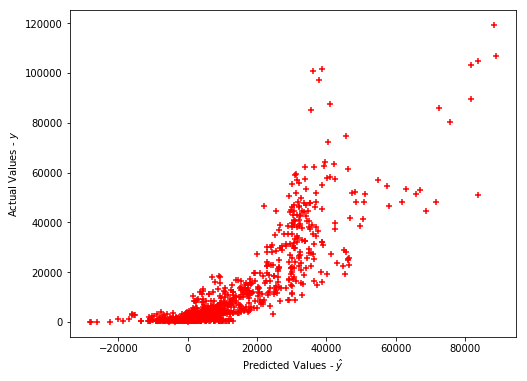

MSE: 94550000.0799


<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     GDP per capita (current US$) [NY.GDP.PCAP.CD]   R-squared:                       0.828
Model:                                                       OLS   Adj. R-squared:                  0.822
Method:                                            Least Squares   F-statistic:                     128.7
Date:                                           Sat, 08 Sep 2018   Prob (F-statistic):          9.17e-292
Time:                                                   12:05:51   Log-Likelihood:                -9108.2
No. Observations:                                            858   AIC:                         1.828e+04
Df Residuals:                                                827   BIC:                         1.843e+04
Df Model:                                                     31                                         
Covariance Type:                                       nonrobust                                         
=================================================================================================================================================
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------
Population, total [SP.POP.TOTL]                                               -3.781e-06   3.97e-06     -0.953      0.341   -1.16e-05       4e-06
Population growth (annual %) [SP.POP.GROW]                                      901.3760    532.971      1.691      0.091    -144.760    1947.512
Surface area (sq. km) [AG.SRF.TOTL.K2]                                           -0.0012      0.001     -2.362      0.018      -0.002      -0.000
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]                        561.5576     86.062      6.525      0.000     392.632     730.483
Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]                       390.4762    907.919      0.430      0.667   -1391.620    2172.573
Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]    -109.6795     18.769     -5.844      0.000    -146.520     -72.840
Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]                    41.4779     30.256      1.371      0.171     -17.910     100.866
Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]          -266.2618     42.068     -6.329      0.000    -348.835    -183.688
Forest area (sq. km) [AG.LND.FRST.K2]                                             0.0012      0.001      1.036      0.300      -0.001       0.003
CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]                        1121.5689    133.481      8.402      0.000     859.567    1383.571
GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]                                       -54.9524    103.078     -0.533      0.594    -257.277     147.372
Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]                           27.5680     58.417      0.472      0.637     -87.094     142.230
Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]    -103.5373     67.802     -1.527      0.127    -236.622      29.547
Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]     -338.5852     62.020     -5.459      0.000    -460.320    -216.850
Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]                       367.0219     38.613      9.505      0.000     291.230     442.814
Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]                      -205.7339     40.272     -5.109      0.000    -284.782    -126.686
Gross capita

In [25]:
test = filtered.drop(['GDP (current US$) [NY.GDP.MKTP.CD]','GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]','GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]','GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]','GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]'], 1)
regression(test,
           'GDP per capita (current US$) [NY.GDP.PCAP.CD]')

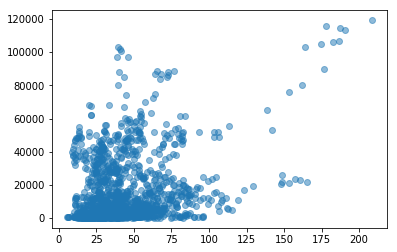

In [26]:
x = filtered['Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]']
plt.scatter(x, y, alpha=0.5)
plt.show()

In [27]:
type(X)

pandas.core.frame.DataFrame

In [28]:
y

5         555.296942
7        7669.273916
8         622.742748
10      21669.410913
12        655.097433
13      27112.256202
15        405.603307
16      11567.666122
17       1276.288034
19       3364.423711
20        374.192394
23       1007.002869
26       3739.116139
29       1609.882452
34        660.192697
40       5101.368479
41        959.372484
42       2472.197831
45        998.196856
46       3808.363689
48       4919.628069
51      14672.882058
53      30743.559174
56       2838.513335
57       1451.290776
58       1428.183004
59       2008.466064
62       4070.032827
66      24253.250425
67      22364.029394
            ...     
3203    24575.403038
3204     1052.127482
3205     6200.173221
3206    14700.218977
3207      708.439476
3210    18629.779663
3211    24202.430836
3214     6433.944544
3216    29623.164445
3217     3820.678185
3223     9564.406383
3224     3379.896499
3225    59180.198978
3226    86605.563376
3228     1104.459019
3229      950.818303
3230     5953

In [29]:
X.head()

,"Population, total [SP.POP.TOTL]",Population growth (annual %) [SP.POP.GROW],Surface area (sq. km) [AG.SRF.TOTL.K2],"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]","Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]","Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]","Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]",Forest area (sq. km) [AG.LND.FRST.K2],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]","Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]","Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]",Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS],Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS],Gross capital formation (% of GDP) [NE.GDI.TOTL.ZS],Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2],Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS],Net barter terms of trade index (2000 = 100) [TT.PRI.MRCH.XD.WD],"Personal remittances, paid (current US$) [BM.TRF.PWKR.CD.DT]","Foreign direct investment, net inflows (BoP, current US$) [BX.KLT.DINV.CD.WD]","Foreign direct investment, net (BoP, current US$) [BN.KLT.DINV.CD]","Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Oil rents (% of GDP) [NY.GDP.PETR.RT.ZS],Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS],Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD],"Compulsory education, duration (years) [SE.COM.DURS]","Preprimary education, duration (years) [SE.PRE.DURS]","Primary education, duration (years) [SE.PRM.DURS]","Secondary education, duration (years) [SE.SEC.DURS]"
5,16440924.0,3.032943,1246700.0,47.113000,6.639,196.6992,207.0,36.0,597280.0,0.580353,3.054624,418.018992,5.664690,72.122955,89.685831,62.861278,30.493219,0.156962,120.060093,100.0,2.662900e+08,8.786200e+08,-8.786200e+08,324.996872,59.685139,2.990000,2.227174e+08,4.0,3.0,4.0,7.0
7,37057452.0,1.110875,2780400.0,73.832000,2.561,66.8976,19.4,91.0,318600.0,3.835574,-0.788999,1.037287,4.679917,25.990948,10.986396,11.636106,16.192696,17.507815,18.119043,100.0,2.677000e+08,1.041831e+10,-9.517286e+09,-0.935939,1.794962,4.600000,1.272618e+10,10.0,3.0,6.0,6.0
8,3069588.0,-0.630957,29740.0,71.409000,1.648,39.3926,30.1,92.0,3330.0,1.128919,5.900000,-1.373676,23.213479,35.420579,23.375279,50.543289,18.643582,0.569653,61.520316,100.0,3.520000e+06,1.041885e+08,-1.041885e+08,-0.790884,0.000000,2.325449,4.568260e+07,10.0,4.0,3.0,7.0
10,19153000.0,1.192272,7741220.0,79.234146,1.756,17.9326,6.2,91.0,1288410.0,17.200610,3.943189,2.579481,3.120484,24.649585,19.443482,21.604155,26.319987,44.907549,32.623574,100.0,8.689906e+08,1.489298e+10,-1.079796e+10,4.475183,1.299188,4.830000,1.948692e+10,10.0,1.0,7.0,6.0
12,8048600.0,0.821520,86600.0,66.763000,2.000,36.5066,74.3,67.0,8718.0,3.666271,11.099999,12.493370,16.085289,42.535343,39.041360,38.378095,20.674000,5.175593,55.323569,100.0,1.009620e+08,1.299370e+08,-1.291770e+08,1.805003,32.500956,4.040000,2.014919e+08,9.0,3.0,4.0,7.0


In [30]:
df['Secondary education, duration (years) [SE.SEC.DURS]']

0         6
1         8
2         6
3       NaN
4         6
5         7
6         5
7         6
8         7
9         5
10        6
11        8
12        7
13        6
14        6
15        7
16        5
17        7
18        6
19        6
20        7
21        7
22        6
23        6
24        8
25        5
26        7
27        5
28        7
29        7
       ... 
3901    NaN
3902      8
3903      6
3904      5
3905      6
3906    NaN
3907    NaN
3908    NaN
3909    NaN
3910    NaN
3911    NaN
3912    NaN
3913    NaN
3914    NaN
3915    NaN
3916    NaN
3917    NaN
3918    NaN
3919    NaN
3920    NaN
3921    NaN
3922    NaN
3923    NaN
3924    NaN
3925    NaN
3926    NaN
3927    NaN
3928    NaN
3929    NaN
3930    NaN
Name: Secondary education, duration (years) [SE.SEC.DURS], Length: 3931, dtype: object

# British dimension

In [31]:
filtered.head()

,"Population, total [SP.POP.TOTL]",Population growth (annual %) [SP.POP.GROW],Surface area (sq. km) [AG.SRF.TOTL.K2],"GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]","GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]","GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]","GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]","Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]","Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]","Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]",Forest area (sq. km) [AG.LND.FRST.K2],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],GDP (current US$) [NY.GDP.MKTP.CD],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]","Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]","Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]",Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS],Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS],Gross capital formation (% of GDP) [NE.GDI.TOTL.ZS],Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2],Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS],Net barter terms of trade index (2000 = 100) [TT.PRI.MRCH.XD.WD],"Personal remittances, paid (current US$) [BM.TRF.PWKR.CD.DT]","Foreign direct investment, net inflows (BoP, current US$) [BX.KLT.DINV.CD.WD]",GDP per capita (current US$) [NY.GDP.PCAP.CD],"Foreign direct investment, net (BoP, current US$) [BN.KLT.DINV.CD]","Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Oil rents (% of GDP) [NY.GDP.PETR.RT.ZS],Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS],Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD],"Compulsory education, duration (years) [SE.COM.DURS]","Preprimary education, duration (years) [SE.PRE.DURS]","Primary education, duration (years) [SE.PRM.DURS]","Secondary education, duration (years) [SE.SEC.DURS]"
5,16440924.0,3.032943,1246700.0,5.903014e+09,360.0,3.054863e+10,1860.0,47.113000,6.639,196.6992,207.0,36.0,597280.0,0.580353,9.129595e+09,3.054624,418.018992,5.664690,72.122955,89.685831,62.861278,30.493219,0.156962,120.060093,100.0,2.662900e+08,8.786200e+08,555.296942,-8.786200e+08,324.996872,59.685139,2.990000,2.227174e+08,4.0,3.0,4.0,7.0
7,37057452.0,1.110875,2780400.0,2.755443e+11,7440.0,4.260279e+11,11500.0,73.832000,2.561,66.8976,19.4,91.0,318600.0,3.835574,2.842038e+11,-0.788999,1.037287,4.679917,25.990948,10.986396,11.636106,16.192696,17.507815,18.119043,100.0,2.677000e+08,1.041831e+10,7669.273916,-9.517286e+09,-0.935939,1.794962,4.600000,1.272618e+10,10.0,3.0,6.0,6.0
8,3069588.0,-0.630957,29740.0,2.025190e+09,660.0,7.312963e+09,2380.0,71.409000,1.648,39.3926,30.1,92.0,3330.0,1.128919,1.911564e+09,5.900000,-1.373676,23.213479,35.420579,23.375279,50.543289,18.643582,0.569653,61.520316,100.0,3.520000e+06,1.041885e+08,622.742748,-1.041885e+08,-0.790884,0.000000,2.325449,4.568260e+07,10.0,4.0,3.0,7.0
10,19153000.0,1.192272,7741220.0,4.042958e+11,21110.0,4.894867e+11,25560.0,79.234146,1.756,17.9326,6.2,91.0,1288410.0,17.200610,4.150342e+11,3.943189,2.579481,3.120484,24.649585,19.443482,21.604155,26.319987,44.907549,32.623574,100.0,8.689906e+08,1.489298e+10,21669.410913,-1.079796e+10,4.475183,1.299188,4.830000,1.948692e+10,10.0,1.0,7.0,6.0
12,8048600.0,0.821520,86600.0,4.922472e+09,610.0,2.690775e+10,3340.0,66.763000,2.000,36.5066,74.3,67.0,8718.0,3.666271,5.272617e+09,11.099999,12.493370,16.085289,42.535343,39.041360,38.378095,20.674000,5.175593,55.323569,100.0,1.009620e+08,1.299370e+08,655.097433,-1.291770e+08,1.805003,32.500956,4.040000,2.014919e+08,9.0,3.0,4.0,7.0


In [32]:
set(british['Current country'])

{'Australia',
 'Bahamas',
 'Belize',
 'Botswana',
 'Burma',
 'Canada',
 'Cyprus',
 'Gambia',
 'Ghana',
 'Guyana',
 'Hong Kong',
 'India',
 'Jamaica',
 'Kenya',
 'Lesotho',
 'Malaysia',
 'Malta',
 'Mauritius',
 'New Zealand',
 'Nigeria',
 'Saudi Arabia',
 'Seychelles',
 'Sierra Leone',
 'Singapore',
 'South Africa',
 'Sri Lanka',
 'St. Kitts and Nevis',
 'United Kingdom',
 'United States',
 'Zimbabwe'}

In [33]:
britain = filtered1[filtered1['Country Name_x'].isin([*set(british['Current country'])])]
britain

,Time_x,Time Code,Country Name_x,Country Code,"Population, total [SP.POP.TOTL]",Population growth (annual %) [SP.POP.GROW],Surface area (sq. km) [AG.SRF.TOTL.K2],"GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]","GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]","GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]","GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]","Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]","Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]","Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]",Forest area (sq. km) [AG.LND.FRST.K2],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],GDP (current US$) [NY.GDP.MKTP.CD],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]","Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]","Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]",Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS],Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS],Gross capital formation (% of GDP) [NE.GDI.TOTL.ZS],Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2],Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS],Net barter terms of trade index (2000 = 100) [TT.PRI.MRCH.XD.WD],"Personal remittances, paid (current US$) [BM.TRF.PWKR.CD.DT]","Foreign direct investment, net inflows (BoP, current US$) [BX.KLT.DINV.CD.WD]",GDP per capita (current US$) [NY.GDP.PCAP.CD],"Foreign direct investment, net (BoP, current US$) [BN.KLT.DINV.CD]","Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Oil rents (% of GDP) [NY.GDP.PETR.RT.ZS],Time_y,Country Name_y,Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS],Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD],"Compulsory education, duration (years) [SE.COM.DURS]","Preprimary education, duration (years) [SE.PRE.DURS]","Primary education, duration (years) [SE.PRM.DURS]","Secondary education, duration (years) [SE.SEC.DURS]"
10,2000,YR2000,Australia,AUS,1.915300e+07,1.192272,7741220.0,4.042958e+11,21110.0,4.894867e+11,25560.0,79.234146,1.7560,17.9326,6.2,91.0,1288410.0,17.200610,4.150342e+11,3.943189,2.579481,3.120484,24.649585,19.443482,21.604155,26.319987,44.907549,32.623574,100.000000,8.689906e+08,1.489298e+10,21669.410913,-1.079796e+10,4.475183,1.299188,2000,Australia,4.83,19486924800,10,1,7,6
19,2000,YR2000,Belize,BLZ,2.473150e+05,3.409050,22970.0,7.797517e+08,3150.0,1.277217e+09,5160.0,68.329000,3.6000,97.2162,24.1,96.0,14593.0,1.601342,8.320724e+08,13.038762,0.458892,14.649289,18.536301,52.970147,73.671469,31.708994,6.797808,89.174927,100.000000,6.435359e+06,2.956465e+07,3364.423711,-2.334076e+07,3.067440,0.000000,2000,Belize,5.12,39877166.08,8,2,6,6
51,2000,YR2000,Cyprus,CYP,9.432860e+05,1.844130,9250.0,1.031573e+10,14860.0,1.426421e+10,20550.0,78.010000,1.7160,9.5572,6.7,86.0,1716.1,7.347326,1.018332e+10,5.724402,3.860879,3.647554,17.686149,69.963441,67.532047,20.579388,23.145024,47.106456,100.000000,4.819981e+07,8.548743e+08,14672.882058,-6.827823e+08,4.141658,0.000000,2000,Cyprus,4.74398418844906,457365463.313375,9,3,6,6
73,2000,YR2000,Ghana,GHA,1.893876e+07,2.465088,238540.0,6.465615e+09,340.0,3.291155e+10,1740.0,56.994000,4.8260,83.9638,100.1,90.0,89090.0,0.332065,4.983024e+09,3.700000,27.230114,35.271522,25.403922,48.802258,67.246173,23.998600,0.686661,93.196413,100.000000,6.089513e+06,1.659000e+08,263.112468,-1.659000e+08,25.193219,0.218084,2000,Ghana,4.58273180000006,221623710.447061,9,2,6,7
82,2000,YR2000,Guyana,GUY,7.533010e+05,-0.262101,214970.0,6.544683e+08,870.0,2.502548e+09,3320.0,64.930000,3.0170,97.1796,46.4,86.0,166220.0,2.137012,7.126679e+08,-1.376728,6.600011,25.845306,24.138539,96.079973,110.688628,23.775982,5.287395,150.280377,100.000000,2.740000e+07,6.710000e+07,

In [34]:
nobritain = filtered1[~filtered1['Country Name_x'].isin([*set(british['Current country'])])]
nobritain

,Time_x,Time Code,Country Name_x,Country Code,"Population, total [SP.POP.TOTL]",Population growth (annual %) [SP.POP.GROW],Surface area (sq. km) [AG.SRF.TOTL.K2],"GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]","GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]","GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]","GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]","Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]","Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]","Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]",Forest area (sq. km) [AG.LND.FRST.K2],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],GDP (current US$) [NY.GDP.MKTP.CD],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]","Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]","Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]",Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS],Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS],Gross capital formation (% of GDP) [NE.GDI.TOTL.ZS],Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2],Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS],Net barter terms of trade index (2000 = 100) [TT.PRI.MRCH.XD.WD],"Personal remittances, paid (current US$) [BM.TRF.PWKR.CD.DT]","Foreign direct investment, net inflows (BoP, current US$) [BX.KLT.DINV.CD.WD]",GDP per capita (current US$) [NY.GDP.PCAP.CD],"Foreign direct investment, net (BoP, current US$) [BN.KLT.DINV.CD]","Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Oil rents (% of GDP) [NY.GDP.PETR.RT.ZS],Time_y,Country Name_y,Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS],Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD],"Compulsory education, duration (years) [SE.COM.DURS]","Preprimary education, duration (years) [SE.PRE.DURS]","Primary education, duration (years) [SE.PRM.DURS]","Secondary education, duration (years) [SE.SEC.DURS]"
5,2000,YR2000,Angola,AGO,1.644092e+07,3.032943,1246700.0,5.903014e+09,360.0,3.054863e+10,1860.0,47.113000,6.639,196.6992,207.0,36.0,597280.0,0.580353,9.129595e+09,3.054624,418.018992,5.664690,72.122955,89.685831,62.861278,30.493219,0.156962,120.060093,100.000000,2.662900e+08,8.786200e+08,555.296942,-8.786200e+08,324.996872,59.685139,2000,Angola,2.99,222717392.2285,4,3,4,7
7,2000,YR2000,Argentina,ARG,3.705745e+07,1.110875,2780400.0,2.755443e+11,7440.0,4.260279e+11,11500.0,73.832000,2.561,66.8976,19.4,91.0,318600.0,3.835574,2.842038e+11,-0.788999,1.037287,4.679917,25.990948,10.986396,11.636106,16.192696,17.507815,18.119043,100.000000,2.677000e+08,1.041831e+10,7669.273916,-9.517286e+09,-0.935939,1.794962,2000,Argentina,4.6,12726176000,10,3,6,6
8,2000,YR2000,Armenia,ARM,3.069588e+06,-0.630957,29740.0,2.025190e+09,660.0,7.312963e+09,2380.0,71.409000,1.648,39.3926,30.1,92.0,3330.0,1.128919,1.911564e+09,5.900000,-1.373676,23.213479,35.420579,23.375279,50.543289,18.643582,0.569653,61.520316,100.000000,3.520000e+06,1.041885e+08,622.742748,-1.041885e+08,-0.790884,0.000000,2000,Armenia,2.32544891428572,45682598.96928,10,4,3,7
12,2000,YR2000,Azerbaijan,AZE,8.048600e+06,0.821520,86600.0,4.922472e+09,610.0,2.690775e+10,3340.0,66.763000,2.000,36.5066,74.3,67.0,8718.0,3.666271,5.272617e+09,11.099999,12.493370,16.085289,42.535343,39.041360,38.378095,20.674000,5.175593,55.323569,100.000000,1.009620e+08,1.299370e+08,655.097433,-1.291770e+08,1.805003,32.500956,2000,Azerbaijan,4.04,201491913.3996,9,3,4,7
13,2000,YR2000,"Bahamas, The",BHS,2.978900e+05,1.460137,13880.0,6.057422e+09,20330.0,5.996169e+09,20130.0,72.370000,2.071,51.1554,16.1,93.0,5150.0,5.601010,8.076470e+09,4.149243,0.921909,1.344647,12.148872,38.047563,41.597381,30.135690,10.582430,32.811364,100.000000,5.617000e+07,2.502500e+08,

In [35]:
britain['Colony'] = 1
nobritain['Colony'] = 0

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
nobritain

,Time_x,Time Code,Country Name_x,Country Code,"Population, total [SP.POP.TOTL]",Population growth (annual %) [SP.POP.GROW],Surface area (sq. km) [AG.SRF.TOTL.K2],"GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]","GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]","GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]","GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]","Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]","Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]","Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]",Forest area (sq. km) [AG.LND.FRST.K2],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],GDP (current US$) [NY.GDP.MKTP.CD],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]","Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]","Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]",Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS],Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS],Gross capital formation (% of GDP) [NE.GDI.TOTL.ZS],Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2],Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS],Net barter terms of trade index (2000 = 100) [TT.PRI.MRCH.XD.WD],"Personal remittances, paid (current US$) [BM.TRF.PWKR.CD.DT]","Foreign direct investment, net inflows (BoP, current US$) [BX.KLT.DINV.CD.WD]",GDP per capita (current US$) [NY.GDP.PCAP.CD],"Foreign direct investment, net (BoP, current US$) [BN.KLT.DINV.CD]","Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Oil rents (% of GDP) [NY.GDP.PETR.RT.ZS],Time_y,Country Name_y,Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS],Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD],"Compulsory education, duration (years) [SE.COM.DURS]","Preprimary education, duration (years) [SE.PRE.DURS]","Primary education, duration (years) [SE.PRM.DURS]","Secondary education, duration (years) [SE.SEC.DURS]",Colony
5,2000,YR2000,Angola,AGO,1.644092e+07,3.032943,1246700.0,5.903014e+09,360.0,3.054863e+10,1860.0,47.113000,6.639,196.6992,207.0,36.0,597280.0,0.580353,9.129595e+09,3.054624,418.018992,5.664690,72.122955,89.685831,62.861278,30.493219,0.156962,120.060093,100.000000,2.662900e+08,8.786200e+08,555.296942,-8.786200e+08,324.996872,59.685139,2000,Angola,2.99,222717392.2285,4,3,4,7,0
7,2000,YR2000,Argentina,ARG,3.705745e+07,1.110875,2780400.0,2.755443e+11,7440.0,4.260279e+11,11500.0,73.832000,2.561,66.8976,19.4,91.0,318600.0,3.835574,2.842038e+11,-0.788999,1.037287,4.679917,25.990948,10.986396,11.636106,16.192696,17.507815,18.119043,100.000000,2.677000e+08,1.041831e+10,7669.273916,-9.517286e+09,-0.935939,1.794962,2000,Argentina,4.6,12726176000,10,3,6,6,0
8,2000,YR2000,Armenia,ARM,3.069588e+06,-0.630957,29740.0,2.025190e+09,660.0,7.312963e+09,2380.0,71.409000,1.648,39.3926,30.1,92.0,3330.0,1.128919,1.911564e+09,5.900000,-1.373676,23.213479,35.420579,23.375279,50.543289,18.643582,0.569653,61.520316,100.000000,3.520000e+06,1.041885e+08,622.742748,-1.041885e+08,-0.790884,0.000000,2000,Armenia,2.32544891428572,45682598.96928,10,4,3,7,0
12,2000,YR2000,Azerbaijan,AZE,8.048600e+06,0.821520,86600.0,4.922472e+09,610.0,2.690775e+10,3340.0,66.763000,2.000,36.5066,74.3,67.0,8718.0,3.666271,5.272617e+09,11.099999,12.493370,16.085289,42.535343,39.041360,38.378095,20.674000,5.175593,55.323569,100.000000,1.009620e+08,1.299370e+08,655.097433,-1.291770e+08,1.805003,32.500956,2000,Azerbaijan,4.04,201491913.3996,9,3,4,7,0
13,2000,YR2000,"Bahamas, The",BHS,2.978900e+05,1.460137,13880.0,6.057422e+09,20330.0,5.996169e+09,20130.0,72.370000,2.071,51.1554,16.1,93.0,5150.0,5.601010,8.076470e+09,4.149243,0.921909,1.344647,12.148872,38.047563,41.597381,30.135690,10.582430,32.811364,100.000000,5.617000e+0

In [37]:
filtered = pd.concat([britain, nobritain])

In [38]:
filtered

,Time_x,Time Code,Country Name_x,Country Code,"Population, total [SP.POP.TOTL]",Population growth (annual %) [SP.POP.GROW],Surface area (sq. km) [AG.SRF.TOTL.K2],"GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]","GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]","GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]","GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]","Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]","Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]","Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]",Forest area (sq. km) [AG.LND.FRST.K2],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],GDP (current US$) [NY.GDP.MKTP.CD],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]","Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]","Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]",Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS],Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS],Gross capital formation (% of GDP) [NE.GDI.TOTL.ZS],Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2],Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS],Net barter terms of trade index (2000 = 100) [TT.PRI.MRCH.XD.WD],"Personal remittances, paid (current US$) [BM.TRF.PWKR.CD.DT]","Foreign direct investment, net inflows (BoP, current US$) [BX.KLT.DINV.CD.WD]",GDP per capita (current US$) [NY.GDP.PCAP.CD],"Foreign direct investment, net (BoP, current US$) [BN.KLT.DINV.CD]","Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Oil rents (% of GDP) [NY.GDP.PETR.RT.ZS],Time_y,Country Name_y,Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS],Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD],"Compulsory education, duration (years) [SE.COM.DURS]","Preprimary education, duration (years) [SE.PRE.DURS]","Primary education, duration (years) [SE.PRM.DURS]","Secondary education, duration (years) [SE.SEC.DURS]",Colony
10,2000,YR2000,Australia,AUS,19153000.0,1.192272,7741220.0,4.042958e+11,21110.0,4.894867e+11,25560.0,79.234146,1.7560,17.9326,6.2,91.0,1288410.0,17.200610,4.150342e+11,3.943189,2.579481,3.120484,24.649585,19.443482,21.604155,26.319987,44.907549,32.623574,100.000000,8.689906e+08,1.489298e+10,21669.410913,-1.079796e+10,4.475183,1.299188,2000,Australia,4.83,19486924800,10,1,7,6,1
19,2000,YR2000,Belize,BLZ,247315.0,3.409050,22970.0,7.797517e+08,3150.0,1.277217e+09,5160.0,68.329000,3.6000,97.2162,24.1,96.0,14593.0,1.601342,8.320724e+08,13.038762,0.458892,14.649289,18.536301,52.970147,73.671469,31.708994,6.797808,89.174927,100.000000,6.435359e+06,2.956465e+07,3364.423711,-2.334076e+07,3.067440,0.000000,2000,Belize,5.12,39877166.08,8,2,6,6,1
51,2000,YR2000,Cyprus,CYP,943286.0,1.844130,9250.0,1.031573e+10,14860.0,1.426421e+10,20550.0,78.010000,1.7160,9.5572,6.7,86.0,1716.1,7.347326,1.018332e+10,5.724402,3.860879,3.647554,17.686149,69.963441,67.532047,20.579388,23.145024,47.106456,100.000000,4.819981e+07,8.548743e+08,14672.882058,-6.827823e+08,4.141658,0.000000,2000,Cyprus,4.74398418844906,457365463.313375,9,3,6,6,1
73,2000,YR2000,Ghana,GHA,18938762.0,2.465088,238540.0,6.465615e+09,340.0,3.291155e+10,1740.0,56.994000,4.8260,83.9638,100.1,90.0,89090.0,0.332065,4.983024e+09,3.700000,27.230114,35.271522,25.403922,48.802258,67.246173,23.998600,0.686661,93.196413,100.000000,6.089513e+06,1.659000e+08,263.112468,-1.659000e+08,25.193219,0.218084,2000,Ghana,4.58273180000006,221623710.447061,9,2,6,7,1
82,2000,YR2000,Guyana,GUY,753301.0,-0.262101,214970.0,6.544683e+08,870.0,2.502548e+09,3320.0,64.930000,3.0170,97.1796,46.4,86.0,166220.0,2.137012,7.126679e+08,-1.376728,6.600011,25.845306,24.138539,96.079973,110.688628,23.775982,5.287395,150.280377,100.000000,2.740000e+07,6.710000e+07,9

In [39]:
y = filtered['GDP per capita (current US$) [NY.GDP.PCAP.CD]']
X = filtered.drop(['GDP per capita (current US$) [NY.GDP.PCAP.CD]','GDP (current US$) [NY.GDP.MKTP.CD]','Time_x','Time_y','Time Code','Country Name_x','Country Name_y','Country Code','GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]','GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]','GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]','GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]'], 1)
X = X.astype('float64')
rf = RandomForestRegressor()
rf.fit(X, y)
names = X.dtypes.index
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.39000000000000001, 'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]'), (0.36820000000000003, 'Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]'), (0.053499999999999999, 'Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]'), (0.025999999999999999, 'Population, total [SP.POP.TOTL]'), (0.021999999999999999, 'Personal remittances, paid (current US$) [BM.TRF.PWKR.CD.DT]'), (0.021399999999999999, 'Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]'), (0.021399999999999999, 'Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]'), (0.015800000000000002, 'Net barter terms of trade index (2000 = 100) [TT.PRI.MRCH.XD.WD]'), (0.0141, 'Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD]'), (0.010999999999999999, 'Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]'), (0.0089999999999999993, 'Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2]'), (0.00

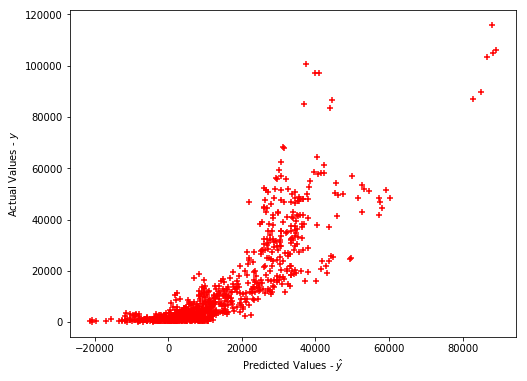

MSE: 91650076.5989


<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     GDP per capita (current US$) [NY.GDP.PCAP.CD]   R-squared:                       0.761
Model:                                                       OLS   Adj. R-squared:                  0.751
Method:                                            Least Squares   F-statistic:                     81.92
Date:                                           Sat, 08 Sep 2018   Prob (F-statistic):          2.20e-231
Time:                                                   12:07:51   Log-Likelihood:                -9072.5
No. Observations:                                            858   AIC:                         1.821e+04
Df Residuals:                                                825   BIC:                         1.837e+04
Df Model:                                                     32                                         
Covariance Type:                                       nonrobust                                         
=================================================================================================================================================
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------
Population, total [SP.POP.TOTL]                                               -2.333e-06   4.17e-06     -0.559      0.576   -1.05e-05    5.86e-06
Population growth (annual %) [SP.POP.GROW]                                      -19.8892    454.693     -0.044      0.965    -912.381     872.603
Surface area (sq. km) [AG.SRF.TOTL.K2]                                           -0.0013      0.001     -2.528      0.012      -0.002      -0.000
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]                        392.8522     83.010      4.733      0.000     229.917     555.788
Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]                       371.5376    868.267      0.428      0.669   -1332.735    2075.810
Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]     -88.1156     17.340     -5.082      0.000    -122.152     -54.079
Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]                    30.7022     26.836      1.144      0.253     -21.972      83.376
Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]          -235.1493     37.736     -6.231      0.000    -309.220    -161.079
Forest area (sq. km) [AG.LND.FRST.K2]                                             0.0012      0.001      1.108      0.268      -0.001       0.003
CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]                        1355.6703    131.368     10.320      0.000    1097.816    1613.524
GDP (current US$) [NY.GDP.MKTP.CD]                                             6.614e-10    1.5e-09      0.440      0.660   -2.29e-09    3.61e-09
GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]                                      -155.0309     99.060     -1.565      0.118    -349.470      39.409
Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]                           24.9202     63.001      0.396      0.693     -98.741     148.581
Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]     -78.1540     63.900     -1.223      0.222    -203.580      47.272
Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]     -349.4876     62.655     -5.578      0.000    -472.470    -226.505
Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]                       336.9423     32.961     10.223      0.000     272.246     401.639
Imports of g

In [43]:
X = filtered.drop(['Time_x','Time_y','Time Code','Country Name_x','Country Name_y','Country Code','GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]','GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]','GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]','GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]'], 1)
X = X.astype('float64')
regression(X,
           'GDP per capita (current US$) [NY.GDP.PCAP.CD]')

In [44]:
y = filtered['GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]']
X = filtered.drop(['GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]','Time_x','Time_y','Time Code','Country Name_x','Country Name_y','Country Code','GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]','GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]','GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]'], 1)
X = X.astype('float64')
rf = RandomForestRegressor()
rf.fit(X, y)
names = X.dtypes.index
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.1386, 'Gross capital formation (% of GDP) [NE.GDI.TOTL.ZS]'), (0.099099999999999994, 'GDP per capita (current US$) [NY.GDP.PCAP.CD]'), (0.059900000000000002, 'Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]'), (0.053900000000000003, 'Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]'), (0.049200000000000001, 'Foreign direct investment, net (BoP, current US$) [BN.KLT.DINV.CD]'), (0.046300000000000001, 'Population growth (annual %) [SP.POP.GROW]'), (0.043999999999999997, 'Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]'), (0.042999999999999997, 'Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2]'), (0.0332, 'Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]'), (0.032000000000000001, 'Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS]'), (0.030200000000000001, 'Net barter terms of trade index (2000 = 100) [TT.PRI.MRCH.XD.WD]'), (0.0292, 'Imports of goods and services (% 

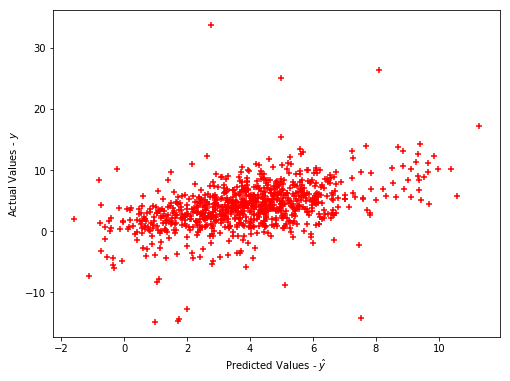

MSE: 12.3230878378


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                       
=====================================================================================================
Dep. Variable:     GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]   R-squared:                       0.281
Model:                                                   OLS   Adj. R-squared:                  0.252
Method:                                        Least Squares   F-statistic:                     9.764
Date:                                       Sat, 08 Sep 2018   Prob (F-statistic):           2.49e-40
Time:                                               12:08:44   Log-Likelihood:                -2242.0
No. Observations:                                        858   AIC:                             4552.
Df Residuals:                                            824   BIC:                             4714.
Df Model:                                                 33                                         
Covariance Type:                                   nonrobust                                         
=================================================================================================================================================
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------
Population, total [SP.POP.TOTL]                                                1.493e-09   1.28e-09      1.167      0.243   -1.02e-09       4e-09
Population growth (annual %) [SP.POP.GROW]                                        0.1393      0.165      0.845      0.398      -0.184       0.463
Surface area (sq. km) [AG.SRF.TOTL.K2]                                        -4.435e-08   1.77e-07     -0.251      0.802   -3.92e-07    3.03e-07
GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]                              -1.925e-12   1.92e-12     -1.003      0.316   -5.69e-12    1.84e-12
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]                         -0.0475      0.029     -1.639      0.102      -0.104       0.009
Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]                         0.2000      0.281      0.712      0.477      -0.351       0.751
Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]       0.0009      0.006      0.150      0.880      -0.011       0.013
Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]                    -0.0094      0.010     -0.947      0.344      -0.029       0.010
Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]             0.0312      0.014      2.290      0.022       0.004       0.058
Forest area (sq. km) [AG.LND.FRST.K2]                                          2.224e-07   3.71e-07      0.599      0.549   -5.06e-07     9.5e-07
CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]                          -0.0647      0.048     -1.345      0.179      -0.159       0.030
GDP (current US$) [NY.GDP.MKTP.CD]                                             1.418e-12   1.92e-12      0.737      0.462   -2.36e-12     5.2e-12
Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]                            0.0482      0.015      3.196      0.001       0.019       0.078
Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]       0.0449      0.022      2.053      0.040       0.002       0.088
Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]        0.0601      0.022      2.777      0.006       0.018       0.103
Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]                         0.0037      0.013      0.287      0.774      -0.022       0.029
Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS

In [46]:
X = filtered.drop(['Time_x','Time_y','Time Code','Country Name_x','Country Name_y','Country Code','GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]','GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]','GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]'], 1)
X = X.astype('float64')
regression(X,
           'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]')

# Poor

In [47]:
poor = filtered[filtered['GDP per capita (current US$) [NY.GDP.PCAP.CD]'] < 20000]

In [48]:
y = poor['GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]']
X = poor.drop(['GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]','Time_x','Time_y','Time Code','Country Name_x','Country Name_y','Country Code','GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]','GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]','GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]'], 1)
X = X.astype('float64')
rf = RandomForestRegressor()
rf.fit(X, y)
names = X.dtypes.index
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.128, 'Gross capital formation (% of GDP) [NE.GDI.TOTL.ZS]'), (0.067799999999999999, 'Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]'), (0.067500000000000004, 'Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2]'), (0.049399999999999999, 'Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]'), (0.049000000000000002, 'Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS]'), (0.043400000000000001, 'Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]'), (0.039800000000000002, 'Forest area (sq. km) [AG.LND.FRST.K2]'), (0.033500000000000002, 'Surface area (sq. km) [AG.SRF.TOTL.K2]'), (0.0327, 'GDP per capita (current US$) [NY.GDP.PCAP.CD]'), (0.031800000000000002, 'Foreign direct investment, net inflows (BoP, current US$) [BX.KLT.DINV.CD.WD]'), (0.031199999999999999, 'Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]'), (0.0309, 'Immunization, measles (% of children ages 12-23 months) [S

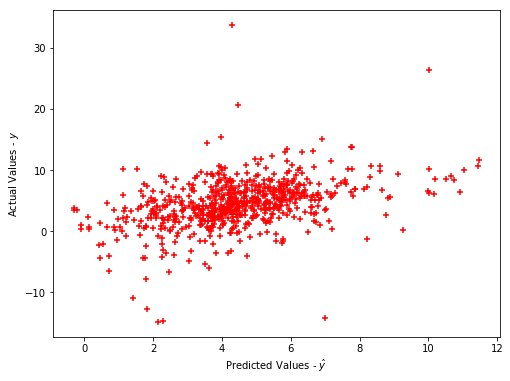

MSE: 13.6419021876


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                       
=====================================================================================================
Dep. Variable:     GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]   R-squared:                       0.232
Model:                                                   OLS   Adj. R-squared:                  0.192
Method:                                        Least Squares   F-statistic:                     5.756
Date:                                       Sat, 08 Sep 2018   Prob (F-statistic):           2.39e-20
Time:                                               12:09:28   Log-Likelihood:                -1748.2
No. Observations:                                        661   AIC:                             3564.
Df Residuals:                                            627   BIC:                             3717.
Df Model:                                                 33                                         
Covariance Type:                                   nonrobust                                         
=================================================================================================================================================
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------
Population, total [SP.POP.TOTL]                                                4.558e-09   2.13e-09      2.138      0.033    3.71e-10    8.75e-09
Population growth (annual %) [SP.POP.GROW]                                        0.2826      0.201      1.409      0.159      -0.111       0.677
Surface area (sq. km) [AG.SRF.TOTL.K2]                                        -5.113e-07   3.13e-07     -1.634      0.103   -1.13e-06    1.03e-07
GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]                              -2.769e-12   6.28e-12     -0.441      0.659   -1.51e-11    9.56e-12
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]                         -0.0053      0.033     -0.163      0.870      -0.069       0.059
Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]                        -0.3282      0.332     -0.988      0.323      -0.980       0.324
Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]      -0.0038      0.007     -0.553      0.580      -0.017       0.010
Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]                     0.0146      0.010      1.424      0.155      -0.006       0.035
Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]             0.0276      0.015      1.803      0.072      -0.002       0.058
Forest area (sq. km) [AG.LND.FRST.K2]                                          1.126e-06   6.25e-07      1.802      0.072   -1.01e-07    2.35e-06
CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]                           0.1411      0.080      1.770      0.077      -0.015       0.298
GDP (current US$) [NY.GDP.MKTP.CD]                                             1.316e-12   5.26e-12      0.250      0.802   -9.01e-12    1.16e-11
Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]                            0.0367      0.022      1.697      0.090      -0.006       0.079
Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]       0.0421      0.024      1.725      0.085      -0.006       0.090
Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]        0.0164      0.025      0.657      0.511      -0.033       0.065
Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]                        -0.0021      0.018     -0.114      0.909      -0.038       0.034
Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS

In [51]:
X = poor.drop(['Time_x','Time_y','Time Code','Country Name_x','Country Name_y','Country Code','GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]','GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]','GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]'], 1)
X = X.astype('float64')
regression(X,
           'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]')

In [52]:
y = poor['GDP per capita (current US$) [NY.GDP.PCAP.CD]']
X = poor.drop(['GDP per capita (current US$) [NY.GDP.PCAP.CD]','GDP (current US$) [NY.GDP.MKTP.CD]','Time_x','Time_y','Time Code','Country Name_x','Country Name_y','Country Code','GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]','GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]','GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]','GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]'], 1)
X = X.astype('float64')
rf = RandomForestRegressor()
rf.fit(X, y)
names = X.dtypes.index
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.42280000000000001, 'Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]'), (0.35470000000000002, 'Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]'), (0.057099999999999998, 'Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2]'), (0.021899999999999999, 'Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD]'), (0.021700000000000001, 'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]'), (0.019300000000000001, 'CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]'), (0.0089999999999999993, 'Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS]'), (0.0086, 'Population growth (annual %) [SP.POP.GROW]'), (0.0080999999999999996, 'Population, total [SP.POP.TOTL]'), (0.0077999999999999996, 'Foreign direct investment, net inflows (BoP, current US$) [BX.KLT.DINV.CD.WD]'), (0.0067000000000000002, 'Net barter terms of trade index (2000 = 100) [TT.PRI.MRCH.XD.WD]'), (0.0066

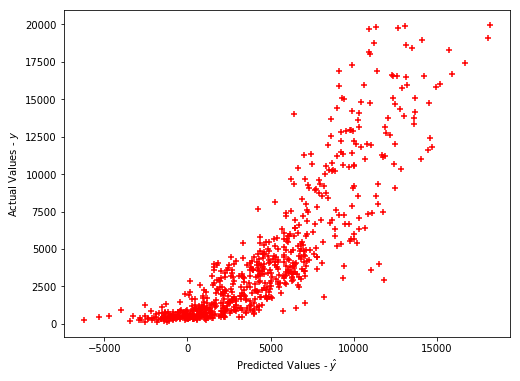

MSE: 5554064.621


<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     GDP per capita (current US$) [NY.GDP.PCAP.CD]   R-squared:                       0.887
Model:                                                       OLS   Adj. R-squared:                  0.882
Method:                                            Least Squares   F-statistic:                     154.8
Date:                                           Sat, 08 Sep 2018   Prob (F-statistic):          3.61e-274
Time:                                                   12:10:24   Log-Likelihood:                -6063.3
No. Observations:                                            661   AIC:                         1.219e+04
Df Residuals:                                                629   BIC:                         1.233e+04
Df Model:                                                     32                                         
Covariance Type:                                       nonrobust                                         
=================================================================================================================================================
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------
Population, total [SP.POP.TOTL]                                               -7.328e-07   1.04e-06     -0.702      0.483   -2.78e-06    1.32e-06
Population growth (annual %) [SP.POP.GROW]                                      -90.1605    144.391     -0.624      0.533    -373.708     193.387
Surface area (sq. km) [AG.SRF.TOTL.K2]                                           -0.0008      0.000     -4.330      0.000      -0.001      -0.000
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]                        125.2911     22.260      5.629      0.000      81.579     169.003
Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]                      -162.2683    239.886     -0.676      0.499    -633.343     308.807
Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]      -3.4782      4.783     -0.727      0.467     -12.872       5.915
Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]                    13.8851      7.485      1.855      0.064      -0.813      28.583
Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]           -42.0245     10.867     -3.867      0.000     -63.364     -20.685
Forest area (sq. km) [AG.LND.FRST.K2]                                             0.0009      0.000      2.464      0.014       0.000       0.002
CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]                         664.5664     48.285     13.764      0.000     569.748     759.385
GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]                                        -1.5223     26.509     -0.057      0.954     -53.579      50.534
Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]                          -15.6887     12.200     -1.286      0.199     -39.646       8.268
Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]     -68.4975     17.078     -4.011      0.000    -102.034     -34.961
Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]      -78.0699     16.522     -4.725      0.000    -110.516     -45.624
Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]                       101.8648     12.705      8.018      0.000      76.916     126.813
Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]                       -23.7017      9.689     -2.446      0.015     -42.729      -4.675
Gross capita

In [53]:
X = poor.drop(['GDP (current US$) [NY.GDP.MKTP.CD]','Time_x','Time_y','Time Code','Country Name_x','Country Name_y','Country Code','GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]','GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]','GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]','GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]'], 1)
X = X.astype('float64')
regression(X,'GDP per capita (current US$) [NY.GDP.PCAP.CD]')

# Rich

In [54]:
poor = filtered[filtered['GDP per capita (current US$) [NY.GDP.PCAP.CD]'] > 20000]

In [55]:
y = poor['GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]']
X = poor.drop(['GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]','Time_x','Time_y','Time Code','Country Name_x','Country Name_y','Country Code','GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]','GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]','GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]'], 1)
X = X.astype('float64')
rf = RandomForestRegressor()
rf.fit(X, y)
names = X.dtypes.index
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.1615, 'Gross capital formation (% of GDP) [NE.GDI.TOTL.ZS]'), (0.12839999999999999, 'Population growth (annual %) [SP.POP.GROW]'), (0.078399999999999997, 'Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]'), (0.070800000000000002, 'Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]'), (0.056099999999999997, 'Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2]'), (0.035099999999999999, 'Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]'), (0.033799999999999997, 'Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]'), (0.0332, 'Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]'), (0.0315, 'CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]'), (0.0304, 'Forest area (sq. km) [AG.LND.FRST.K2]'), (0.029499999999999998, 'Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS]'), (0.029399999999999999, 'Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]'), (0.02

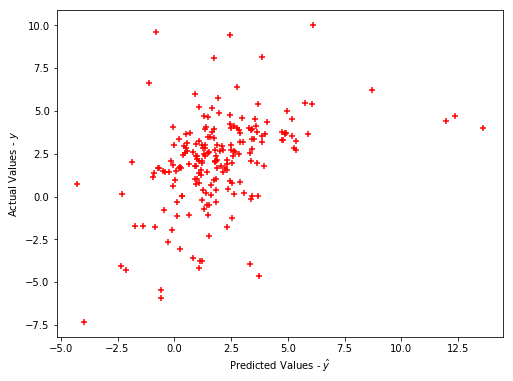

MSE: 7.15501246567


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                       
=====================================================================================================
Dep. Variable:     GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]   R-squared:                       0.416
Model:                                                   OLS   Adj. R-squared:                  0.298
Method:                                        Least Squares   F-statistic:                     3.516
Date:                                       Sat, 08 Sep 2018   Prob (F-statistic):           5.56e-08
Time:                                               12:11:04   Log-Likelihood:                -444.80
No. Observations:                                        197   AIC:                             957.6
Df Residuals:                                            163   BIC:                             1069.
Df Model:                                                 33                                         
Covariance Type:                                   nonrobust                                         
=================================================================================================================================================
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------
Population, total [SP.POP.TOTL]                                               -1.337e-08   2.46e-08     -0.544      0.587   -6.19e-08    3.52e-08
Population growth (annual %) [SP.POP.GROW]                                        0.0217      0.371      0.058      0.953      -0.711       0.755
Surface area (sq. km) [AG.SRF.TOTL.K2]                                        -4.052e-07   3.89e-07     -1.041      0.299   -1.17e-06    3.63e-07
GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]                               -2.57e-12   1.91e-12     -1.345      0.181   -6.34e-12     1.2e-12
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]                         -0.0766      0.103     -0.744      0.458      -0.280       0.127
Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]                         1.2508      0.861      1.452      0.148      -0.450       2.951
Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]      -0.0108      0.059     -0.182      0.856      -0.128       0.106
Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]                    -0.2545      0.222     -1.145      0.254      -0.693       0.184
Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]            -0.0351      0.046     -0.765      0.446      -0.126       0.055
Forest area (sq. km) [AG.LND.FRST.K2]                                          4.496e-07   1.29e-06      0.350      0.727   -2.09e-06    2.99e-06
CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]                           0.0712      0.105      0.676      0.500      -0.137       0.279
GDP (current US$) [NY.GDP.MKTP.CD]                                             3.178e-12   2.24e-12      1.418      0.158   -1.25e-12     7.6e-12
Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]                            0.0304      0.098      0.310      0.757      -0.163       0.224
Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]      -0.0795      0.197     -0.405      0.686      -0.468       0.309
Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]       -0.0773      0.092     -0.839      0.403      -0.259       0.105
Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]                         0.1452      0.079      1.841      0.067      -0.011       0.301
Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS

In [56]:
X = poor.drop(['Time_x','Time_y','Time Code','Country Name_x','Country Name_y','Country Code','GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]','GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]','GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]'], 1)
X = X.astype('float64')
regression(X,
           'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]')

In [57]:
y = poor['GDP per capita (current US$) [NY.GDP.PCAP.CD]']
X = poor.drop(['GDP per capita (current US$) [NY.GDP.PCAP.CD]','GDP (current US$) [NY.GDP.MKTP.CD]','Time_x','Time_y','Time Code','Country Name_x','Country Name_y','Country Code','GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]','GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]','GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]','GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]'], 1)
X = X.astype('float64')
rf = RandomForestRegressor()
rf.fit(X, y)
names = X.dtypes.index
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.21929999999999999, 'Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]'), (0.15690000000000001, 'Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]'), (0.060699999999999997, 'Population, total [SP.POP.TOTL]'), (0.056300000000000003, 'Personal remittances, paid (current US$) [BM.TRF.PWKR.CD.DT]'), (0.053100000000000001, 'Primary education, duration (years) [SE.PRM.DURS]'), (0.044600000000000001, 'Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]'), (0.043499999999999997, 'Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]'), (0.040899999999999999, 'Population growth (annual %) [SP.POP.GROW]'), (0.0402, 'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]'), (0.039, 'Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]'), (0.037100000000000001, 'Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD]'), (0.021600000000000001, 'Gross capital formation (% of GDP

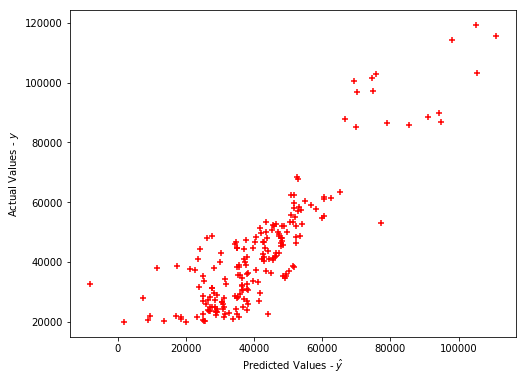

MSE: 99698926.9543


<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     GDP per capita (current US$) [NY.GDP.PCAP.CD]   R-squared:                       0.979
Model:                                                       OLS   Adj. R-squared:                  0.975
Method:                                            Least Squares   F-statistic:                     237.7
Date:                                           Sat, 08 Sep 2018   Prob (F-statistic):          1.14e-121
Time:                                                   12:11:05   Log-Likelihood:                -2009.6
No. Observations:                                            197   AIC:                             4083.
Df Residuals:                                                165   BIC:                             4188.
Df Model:                                                     32                                         
Covariance Type:                                       nonrobust                                         
=================================================================================================================================================
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------
Population, total [SP.POP.TOTL]                                                  -0.0001   5.07e-05     -2.889      0.004      -0.000   -4.64e-05
Population growth (annual %) [SP.POP.GROW]                                     -718.0976    999.717     -0.718      0.474   -2691.985    1255.790
Surface area (sq. km) [AG.SRF.TOTL.K2]                                           -0.0034      0.001     -3.013      0.003      -0.006      -0.001
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]                       -404.2645    294.150     -1.374      0.171    -985.048     176.519
Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]                     -5532.2108   2622.251     -2.110      0.036   -1.07e+04    -354.718
Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]     517.6263    151.731      3.411      0.001     218.041     817.211
Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]                 -4444.3953    490.566     -9.060      0.000   -5412.991   -3475.800
Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]          -127.1890    141.355     -0.900      0.370    -406.286     151.908
Forest area (sq. km) [AG.LND.FRST.K2]                                             0.0161      0.003      4.613      0.000       0.009       0.023
CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]                         111.3812    312.049      0.357      0.722    -504.743     727.505
GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]                                       -28.1278    242.271     -0.116      0.908    -506.478     450.223
Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]                         -233.0470    261.569     -0.891      0.374    -749.501     283.407
Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]   -3420.4748    546.473     -6.259      0.000   -4499.455   -2341.494
Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]    -1946.5638    181.179    -10.744      0.000   -2304.292   -1588.836
Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]                      1806.4116    175.750     10.278      0.000    1459.402    2153.421
Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]                     -2086.6810    210.014     -9.936      0.000   -2501.343   -1672.019
Gross capita

In [58]:
X = poor.drop(['GDP (current US$) [NY.GDP.MKTP.CD]','Time_x','Time_y','Time Code','Country Name_x','Country Name_y','Country Code','GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]','GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]','GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]','GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]'], 1)
X = X.astype('float64')
regression(X,'GDP per capita (current US$) [NY.GDP.PCAP.CD]')

In [59]:
poor[poor['Colony'] == 1]['Country Name_x'].value_counts()

United Kingdom    15
United States     15
Australia         14
Cyprus            12
New Zealand       12
Canada             8
Malta              7
Saudi Arabia       5
Name: Country Name_x, dtype: int64

# Decision Tree

In [63]:
def decisiontree(df, y):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    X = df.drop([y],1)
    y = df[y]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
    clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
    return clf.score(X_test, y_test)

In [67]:
X = poor.drop(['GDP (current US$) [NY.GDP.MKTP.CD]','Time_x','Time_y','Time Code','Country Name_x','Country Name_y','Country Code','GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]','GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]','GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]','GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]'], 1)
X = X.astype('float64')
decisiontree(X,
           'Colony')

0.98477157360406087

In [72]:
X = filtered.drop(['GDP (current US$) [NY.GDP.MKTP.CD]','Time_x','Time_y','Time Code','Country Name_x','Country Name_y','Country Code','GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]','GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]','GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]','GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]'], 1)
X = X.astype('float64')
decisiontree(X,
           'Colony')

0.96973224679860304

In [70]:
import sklearn
sklearn.tree.export_graphviz(clf, max_depth=3, out_file='areyouacolony.dot')

NameError: name 'clf' is not defined

In [77]:
def tree(df, y):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    X = df.drop([y],1)
    y = df[y]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
    clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
    return clf
def decisiontree(df, y):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    X = df.drop([y],1)
    y = df[y]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
    clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
    return clf.score(X_test,y_test)

In [75]:
decisiontree(X,'Colony')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [84]:
sklearn.tree.export_graphviz(tree(X,'Colony'), max_depth=3, out_file='montgomeryshrunk.dot')

In [87]:
[*X.columns][26]

'Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS]'